CÁC BƯỚC XÂY DỰNG MÔ HÌNH

I. DATA

1. Data quality control (null, nan, outlier,...)
2. Mã hóa
3. Chuẩn hóa (nếu cần)
4. EDA, phân tích mô tả
5. Lựa chọn biến đầu vào
6. Chia tập train/test set
7. Xử lí cân bằng data (nếu cần)

II. Model

1. Dựa vào dữ liệu y để lựa chọn mô hình phù hợp
2. Cài đặt, tối ưu siêu tham số nếu cần
3. Xây dựng > 1 mo hình để so sánh, tìm mô hình phù hợp, tốt hơn

III. Evaluate model

1. Dựa vào dữ liệu y để lựa chọn công thức đánh giá phù hợp


1. XỬ LÍ NAN/NULL DATA

nam/null data: Những data bị lỗi, bị trống hoặc outlier cũng quy về nan data

Với NaN/Null chúng ta có thể bổ sung vào bằng cách điền vào giá trị trung bình của chuỗi (nếu chuối liên tục) hoặc điền vào bằng mode của chuỗi, nếu chuỗi là rời rạc

Với NaN/Null quá nhiều chúng ta có thể cân nhắc tới việc loại bỏ biến đó vì khi thiếu quá nhiều data thì chúng ta điền thêm thì vô tình thành fake data, mô hình có thể đẹp nhưng lại sai so với thực tế. Mức độ cụ thể nhiều là thế nào thì không có quy chuẩn nhưng nếu trên 5% chúng ta nên xóa bỏ chứ không nên fill data

Một số vấn đề có thể xảy ra như data bị trùng lặp, sai định dạng,.. chúng ta cần chủ động xử lí

2. MÃ HÓA DỮ LIỆU

why?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Lesson5_a_Weather.csv')

Saving Lesson5_a_Weather.csv to Lesson5_a_Weather.csv


In [4]:
df.head(5)

,id,outlook,temperature,humidity,wind,play
0,1,sunny,hot,high,weak,no
1,2,sunny,hot,high,strong,no
2,3,overcast,hot,high,weak,yes
3,4,rainy,mild,high,weak,yes
4,5,rainy,cool,normal,weak,yes


In [5]:
# Mã hóa thủ công nếu số lượng mã hóa ít

#df['play'].replace(to_replace=['no','yes'], value= [0,1], inplace = True)

df['play'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)

In [6]:
df

,id,outlook,temperature,humidity,wind,play
0,1,sunny,hot,high,weak,0
1,2,sunny,hot,high,strong,0
2,3,overcast,hot,high,weak,1
3,4,rainy,mild,high,weak,1
4,5,rainy,cool,normal,weak,1
5,6,rainy,cool,normal,strong,0
6,7,overcast,cool,normal,strong,1
7,8,sunny,mild,high,weak,0
8,9,sunny,cool,normal,weak,1
9,10,rainy,mild,normal,weak,1


In [7]:
# mã hóa dùng thư viện labelencoder

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)

In [8]:
df

,id,outlook,temperature,humidity,wind,play
0,0,2,1,0,1,0
1,1,2,1,0,0,0
2,2,0,1,0,1,1
3,3,1,2,0,1,1
4,4,1,0,1,1,1
5,5,1,0,1,0,0
6,6,0,0,1,0,1
7,7,2,2,0,1,0
8,8,2,0,1,1,1
9,9,1,2,1,1,1


In [9]:
# mã hóa bằng one hot

df = pd.read_csv('Lesson5_a_Weather.csv', encoding = 'unicode-escape')

onehot = pd.get_dummies(df)
df_new = pd.concat([onehot], axis=1)
df_new

,id,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,wind_strong,wind_weak,play_no,play_yes
0,1,0,0,1,0,1,0,1,0,0,1,1,0
1,2,0,0,1,0,1,0,1,0,1,0,1,0
2,3,1,0,0,0,1,0,1,0,0,1,0,1
3,4,0,1,0,0,0,1,1,0,0,1,0,1
4,5,0,1,0,1,0,0,0,1,0,1,0,1
5,6,0,1,0,1,0,0,0,1,1,0,1,0
6,7,1,0,0,1,0,0,0,1,1,0,0,1
7,8,0,0,1,0,0,1,1,0,0,1,1,0
8,9,0,0,1,1,0,0,0,1,0,1,0,1
9,10,0,1,0,0,0,1,0,1,0,1,0,1


3 CHUẨN HÓA DỮ LIỆU

Tại sao cần phải chuẩn hóa dữ liệu??

=> Chuẩn hóa dữ liệu là việc cần thiết phải thực hiện để nâng cao hiệu suất (độ chính xác + tốc độ tính toán)

Cụ thể với một số thuật toán: Với bài toán hồi quy hay mạng ANN, RNN...: chuẩn hóa giúp đơn giản quá trình tính toán Gradient Descent, dễ tìm điểm tối ưu hơn. Tăng độ chính xác, thời gian tính toán

Đối với những thuật toán dựa trên xác suất cũng như cây quyết dịnh có lẽ ta không cần tới chuẩn hóa: Decision Tree, Random Forest


PHƯƠNG PHÁP CHUẨN HÓA

=> Ở đây chúng ta chỉ quan tâm đến hai phương pháp và không cần quan tâm nhiều hơn vì hai phương pháp này đáp ứng hầu hết các bài toán về ML

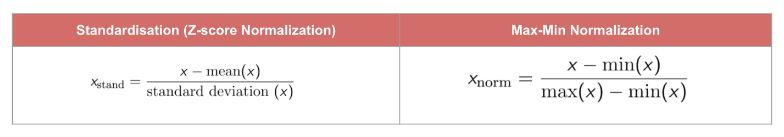

In [10]:
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

uploaded = files.upload()

df = pd.read_csv('Lesson_add1.csv')

Saving Lesson_add1.csv to Lesson_add1.csv


In [11]:
df.head(5)

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,50000,Yes


In [12]:
# mã hóa cột country thành 0 - 1

df = pd.get_dummies(data = df, columns = ['Country'])
df.head(5)

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44,72000,No,1,0,0
1,27,48000,Yes,0,0,1
2,30,54000,No,0,1,0
3,38,61000,No,0,0,1
4,40,50000,Yes,0,1,0


In [13]:
df['Purchased'] = df['Purchased'].apply(lambda x:0 if x == 'No' else 1)
df.head(5)

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44,72000,0,1,0,0
1,27,48000,1,0,0,1
2,30,54000,0,0,1,0
3,38,61000,0,0,0,1
4,40,50000,1,0,1,0


<ipython-input-14-aa9191a73eff>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary']/1000)
<ipython-input-14-aa9191a73eff>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

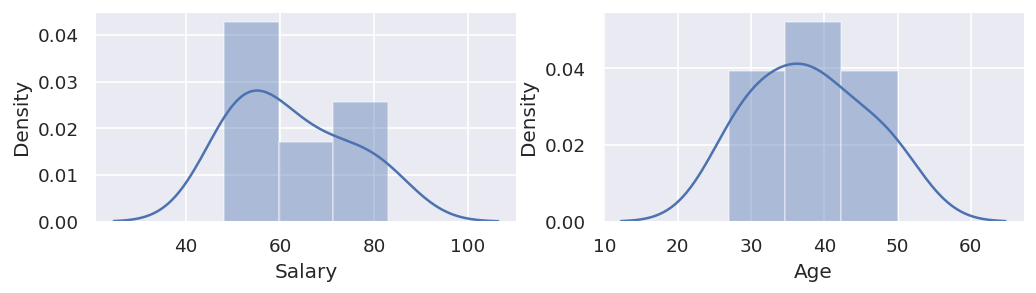

In [14]:
# vẽ phân phối cho raw data

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df['Salary']/1000)
plt.subplot(2,2,2)
sns.distplot(df['Age'])

In [15]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler()
X_std = X_std.fit_transform(df)

In [16]:
# chuyển về data ban đầu

X_std = pd.DataFrame(data = X_std, columns = ['Age','Salary','Purchased','Country_France','Country_Germany','Country_Spain'])
X_std.head(5)

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,0.827885,0.818869,-1.0,1.224745,-0.654654,-0.654654
1,-1.479335,-1.228304,1.0,-0.816497,-0.654654,1.527525
2,-1.072179,-0.716511,-1.0,-0.816497,1.527525,-0.654654
3,0.013572,-0.119418,-1.0,-0.816497,-0.654654,1.527525
4,0.285010,-1.057706,1.0,-0.816497,1.527525,-0.654654


<ipython-input-17-2dee6549b76d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary']/1000)
<ipython-input-17-2dee6549b76d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
<ipython-input-17-2dee6549b76d>:10: UserWarning: 

`distplot` is a deprecated function and will be remov

Text(0.5, 0, 'Age [StandardScaler]')

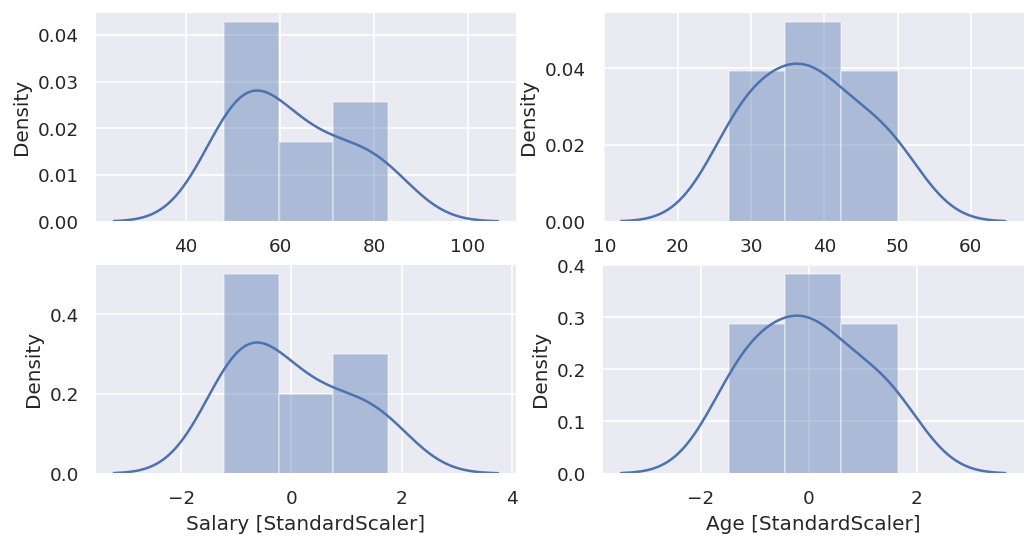

In [17]:
# vẽ phân phối của data đã mormalize

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df['Salary']/1000)
plt.xlabel('Salary [x1000USD]')
plt.subplot(2,2,2)
sns.distplot(df['Age'])
plt.subplot(2,2,3)
sns.distplot(X_std['Salary'])
plt.xlabel('Salary [StandardScaler]')
plt.subplot(2,2,4)
sns.distplot(X_std['Age'])
plt.xlabel('Age [StandardScaler]')

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

X_feature = scaler.transform(df)
X_MinMax = pd.DataFrame(data = X_feature, columns=["Age", "Salary","Purchased","Country_France","Country_Germany", "Country_spain"])
X_MinMax.head(5)

,Age,Salary,Purchased,Country_France,Country_Germany,Country_spain
0,0.739130,0.685714,0.0,1.0,0.0,0.0
1,0.000000,0.000000,1.0,0.0,0.0,1.0
2,0.130435,0.171429,0.0,0.0,1.0,0.0
3,0.478261,0.371429,0.0,0.0,0.0,1.0
4,0.565217,0.057143,1.0,0.0,1.0,0.0


<ipython-input-19-793c5c9544fa>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary']/1000)
<ipython-input-19-793c5c9544fa>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
<ipython-input-19-793c5c9544fa>:10: UserWarning: 

`distplot` is a deprecated function and will be remov

Text(0.5, 0, 'Age Min Max')

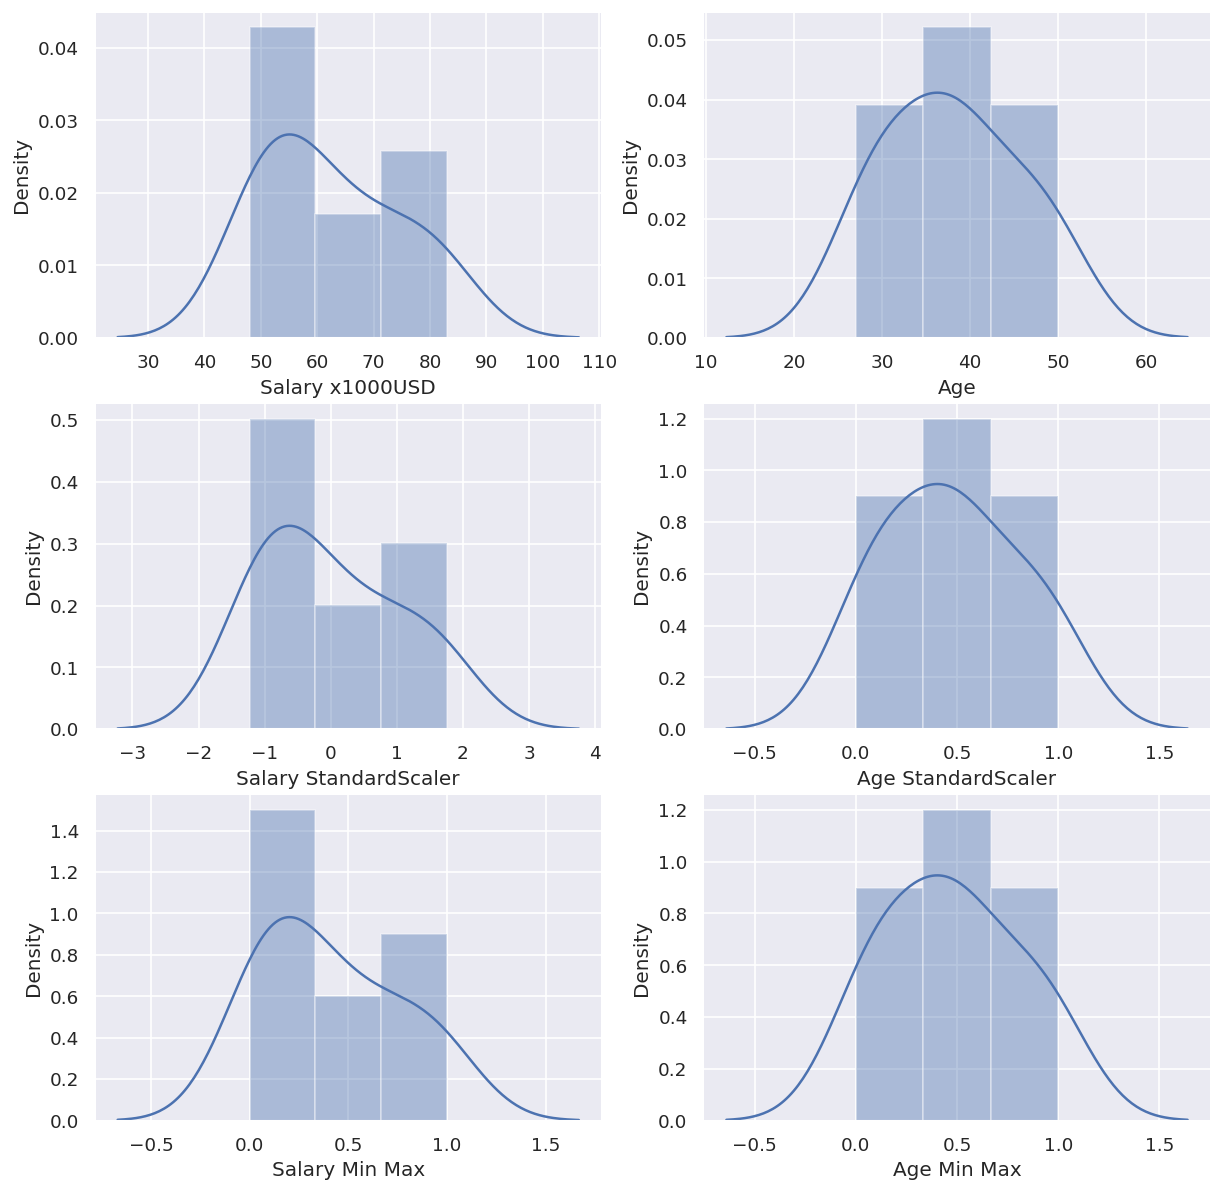

In [19]:
# vẽ phân phối data đã normalize

plt.figure(figsize = (12,12))
plt.subplot(3,2,1)
sns.distplot(df['Salary']/1000)
plt.xlabel('Salary x1000USD')
plt.subplot(3,2,2)
sns.distplot(df['Age'])
plt.subplot(3,2,3)
sns.distplot(X_std['Salary'])
plt.xlabel('Salary StandardScaler')
plt.subplot(3,2,4)
sns.distplot(X_MinMax['Age'])
plt.xlabel('Age StandardScaler')
plt.subplot(3,2,5)
sns.distplot(X_MinMax['Salary'])
plt.xlabel('Salary Min Max')
plt.subplot(3,2,6)
sns.distplot(X_MinMax['Age'])
plt.xlabel('Age Min Max')

In [20]:
# so sánh standard deviation của các hình

#Min_Max Normaralisation tạo ra chuỗi data có giới hạn trong khoảng 0.1
#Standardisation đưa các chuỗi data về khoảng có giá trị trung bình là 0

5. LỰA CHỌN BIẾN ĐẦU VÀO

In [21]:
uploaded = files.upload()

df = pd.read_csv('Lesson7.csv')

Saving Lesson7.csv to Lesson7.csv


In [22]:
df.head(5)

,Country,Life Expectancy (Year),CO2 emissions (Billion tons),GDP per capita ($),Rate of using basic drinking water (%),Obesity among adults (%),Beer consumption per capita (Liter)
0,Albania,78.025,1.603775,11658.905520,93.39,21.7,1.48
1,Algeria,76.090,3.933496,12015.640530,93.41,25.7,0.31
2,Angola,59.398,1.135044,7337.569901,54.32,6.5,3.25
3,Argentina,76.068,4.301914,20105.198990,98.97,28.0,3.39
4,Armenia,74.467,1.825292,9969.664854,99.55,20.2,0.49


<ipython-input-23-6e17e91672c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

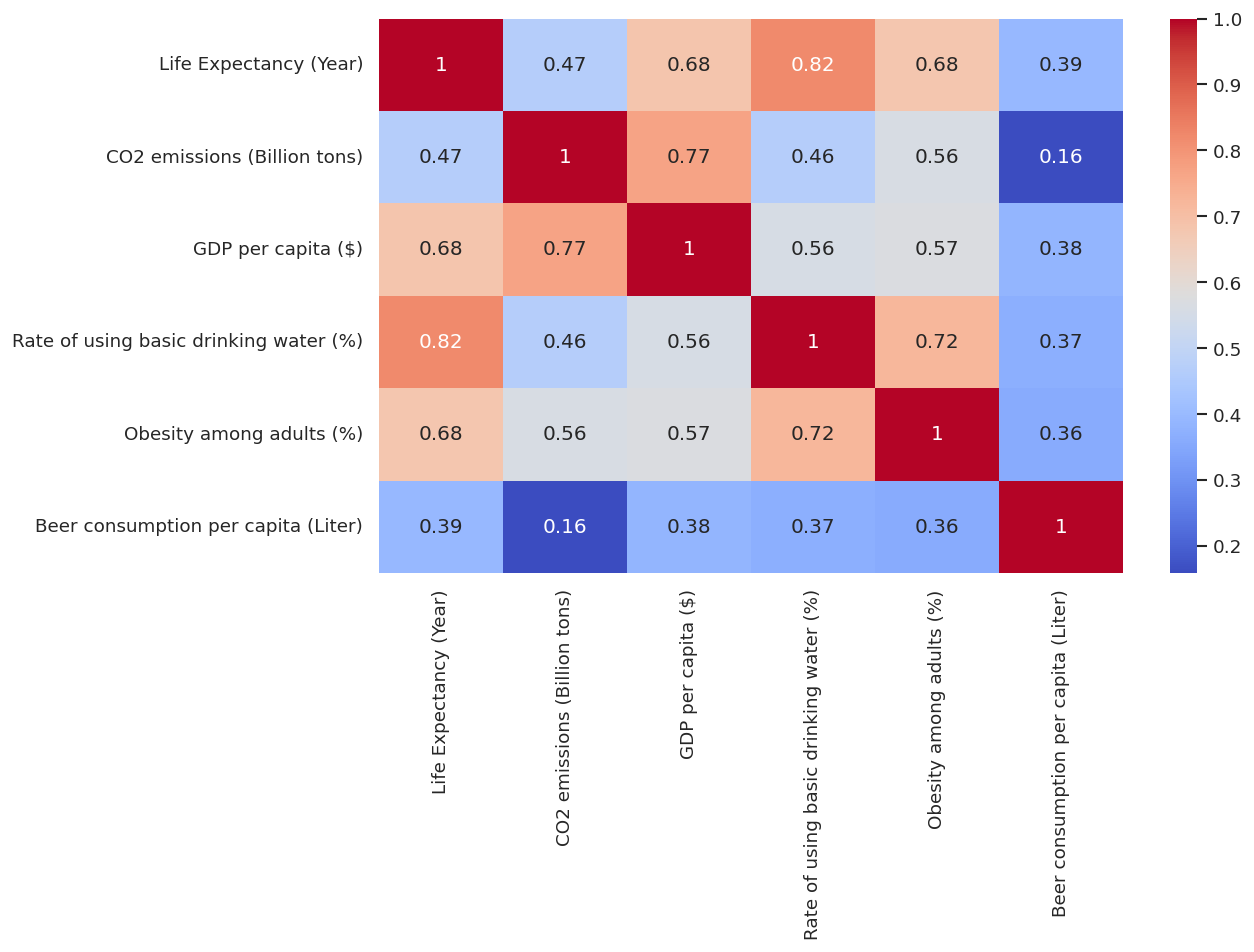

In [23]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

7. XỬ LÝ MẤT CÂN BẰNG DATA

Mất cân bằng data (vấn đề tương đối phức tạp)

Phương pháp xử lý (Undersampling, Oversampling)

- Undersampling: cân bằng lại số lượng theo tỷ lệ 5/5 đến 6/4... bằng cách bổ sung với số liệu có tỉ lệ ít nếu có nguồn đáng tin cậy hoặc xóa ngẫu nhiên đối với số liệu có tỷ lệ cao (xóa theo một phương pháp nào đó)

- Cách tối ưu cho vấn đề mất cân bằng data là chạy mô hình với tỷ lệ gốc và chạy thêm các mô hình với tỷ lệ thay đổi khác nhau sau đó so sánh độ chính xác để có câu trả lời tối ưu

- Oversampling: Nearmiss, smote

=> Chú ý xử lí mất cân bằng data trên tập training

In [24]:
uploaded = files.upload()

df = pd.read_csv('imbalanced_data.csv')

Saving imbalanced_data.csv to imbalanced_data.csv


In [25]:
df.head(5)

,x1,x2,x3,x4,x5,y
0,-10.800342,3.172799,5.239638,7.307207,5.994013,0
1,-14.990925,3.017590,3.977746,5.360931,4.784813,0
2,-11.717584,1.484062,6.603974,7.225007,3.876819,0
3,-10.977639,4.676936,6.553846,7.233869,4.575602,0
4,-12.325822,2.746790,5.453274,4.684579,2.429539,0


In [26]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df.y

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.3)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(x_train, y_train)
y_predictLR = model.predict(x_test)
y_predictLR

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predictLR)
cnf_matrix

array([[249,   5],
       [  5,  38]])

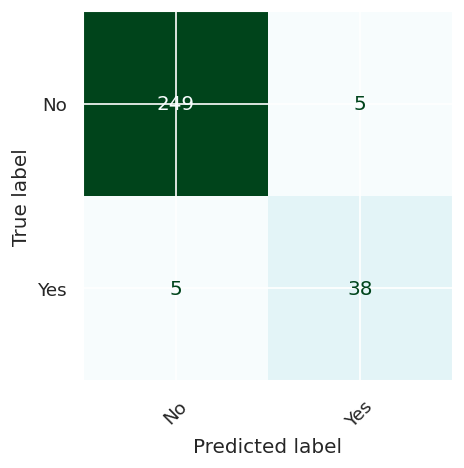

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize = (4,4))
labels = ['No','Yes']
ConfusionMatrixDisplay.from_predictions(y_test, y_predictLR, ax = ax, display_labels = labels, colorbar = False, xticks_rotation = 45, cmap = 'BuGn')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictLR))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       254
           1       0.88      0.88      0.88        43

    accuracy                           0.97       297
   macro avg       0.93      0.93      0.93       297
weighted avg       0.97      0.97      0.97       297



In [30]:
# xử lý mất cân bằng
#undersampling

In [31]:
# đếm số lượng các giá trị trong cột y
df['y'].value_counts()

0    850
1    140
Name: y, dtype: int64

<Axes: ylabel='y'>

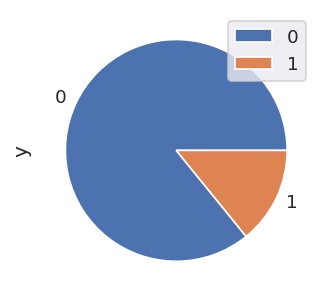

In [32]:
df['y'].value_counts().plot.pie(legend=['0','1'])

In [33]:
# undersampling - phân chia thủ công, tỷ lệ 1:1

df_0= df[df.y==0] # chia bảng data theo nhóm có y = 0
df_1 = df[df.y==1]
df_0.shape, df_1.shape # in ra size của từng mảng data



((850, 6), (140, 6))

In [34]:
df_0_resapled = df_0.sample(140) # lấy ngẫu nhiên 140 dòng dữ liệu từ bảng data y = 0

df_0_resapled.shape

(140, 6)

In [35]:
df_under = pd.concat([df_0_resapled,df_1])

In [36]:
df_under.head(5)

,x1,x2,x3,x4,x5,y
135,-10.843126,4.789803,3.332856,4.705706,3.657740,0
573,-12.957804,2.648245,5.207149,5.788425,4.561878,0
399,-12.377574,3.344578,6.305020,7.335276,5.058991,0
176,-10.439073,4.556920,4.299051,4.623255,4.308877,0
333,-12.941735,0.900093,7.191432,5.761267,4.917940,0


In [37]:
# chia lại x,y và chạy lại mô hình

x = df_under.iloc[:,:-1]
y = df_under.y
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.3)

In [38]:
model_under = LogisticRegression()
model_under.fit(x_train, y_train)
y_predictLR_under = model_under.predict(x_test)
y_predictLR_under

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [39]:
cnf_matrix = confusion_matrix(y_test, y_predictLR_under)
cnf_matrix

array([[39,  1],
       [ 3, 41]])

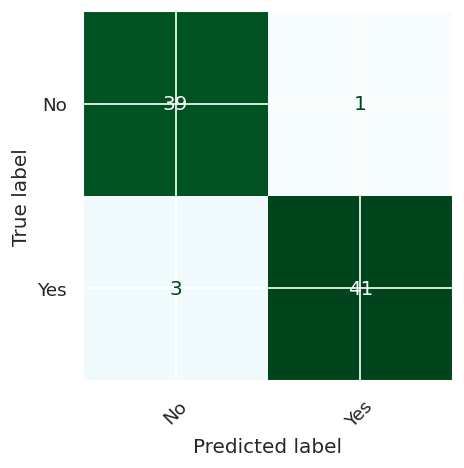

In [40]:
fig, ax = plt.subplots(figsize=(4,4))
labels = ['No','Yes']
ConfusionMatrixDisplay.from_predictions(y_test, y_predictLR_under, ax=ax, display_labels = labels, colorbar = False, xticks_rotation = 45, cmap = 'BuGn')

In [41]:
print(classification_report(y_test, y_predictLR_under))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.98      0.93      0.95        44

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



In [42]:
# undersampling - phân chia tự động bằng phương pháp nearmiss

!pip install imbalanced-learn

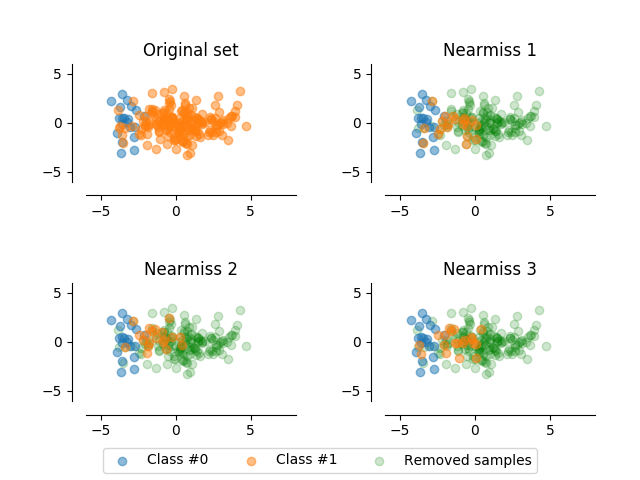

- NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.

- NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.

- NearMiss-3: Majority class examples with minimum distance to each minority class example.

In [43]:
# load lại data của x và y từ data bảng gốc

x = df.iloc[:,:-1]
y = df.y
x

,x1,x2,x3,x4,x5
0,-10.800342,3.172799,5.239638,7.307207,5.994013
1,-14.990925,3.017590,3.977746,5.360931,4.784813
2,-11.717584,1.484062,6.603974,7.225007,3.876819
3,-10.977639,4.676936,6.553846,7.233869,4.575602
4,-12.325822,2.746790,5.453274,4.684579,2.429539
...,...,...,...,...,...
985,-11.634486,2.082369,4.837779,4.074321,6.678578
986,-10.930288,1.927491,4.471644,8.255894,6.459318
987,-12.592138,2.211808,6.383534,3.825391,2.505188
988,-11.397795,2.734885,5.705916,5.663749,5.606066


In [45]:
from imblearn.under_sampling import NearMiss

model_nearmiss = NearMiss(version=3)

x_under, y_under = model_nearmiss.fit_resample(x_train, y_train)
x_under.shape, y_under.shape # kích thước của x và y đã được lấy mẫu lại

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


((131, 5), (131,))

In [46]:
np.count_nonzero(y_under==1) # đếm giá trị 1 của y_under

96

In [47]:
np.count_nonzero(y_under==0)

35

In [48]:
# chạy lại mô hình

x_train = x_under
y_train = y_under

model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [50]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.98      0.93      0.95        44

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



In [51]:
cnf_matrix = confusion_matrix(y_test, y_predict)
cnf_matrix

array([[39,  1],
       [ 3, 41]])

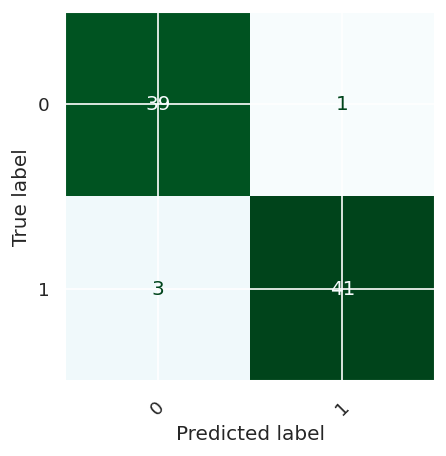

In [52]:
fig, ax = plt.subplots(figsize = (4,4))
labels = ['No','Yes']
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, ax = ax, colorbar = False, xticks_rotation = 45, cmap = 'BuGn')

In [54]:
# Oversampling
# imblearn

from imblearn.over_sampling import RandomOverSampler

model_ROS = RandomOverSampler()
x_over , y_over = model_ROS.fit_resample(x_train, y_train)
x_over.shape, y_over.shape

((192, 5), (192,))

In [55]:
# chạy lại mô hình
x_train = x_over
y_train = y_over

model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [56]:
y_predict

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.97      0.86      0.92        44

    accuracy                           0.92        84
   macro avg       0.92      0.92      0.92        84
weighted avg       0.92      0.92      0.92        84



In [58]:
confusion_matrix(y_test, y_predict)

array([[39,  1],
       [ 6, 38]])

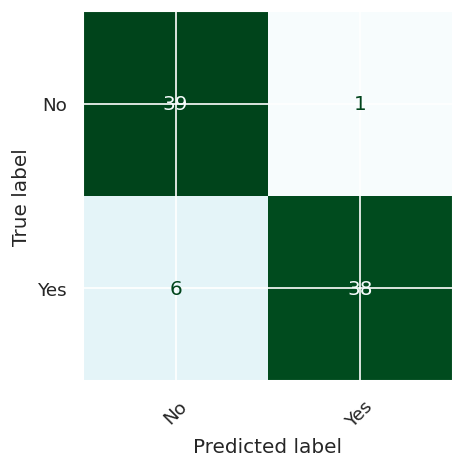

In [59]:
fig, ax = plt.subplots(figsize=(4,4))
labels = ['No','Yes']
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, ax = ax, colorbar=False, xticks_rotation = 45, cmap = 'BuGn', display_labels=labels)

In [ ]:
#Oversampling
# SMOTE (Synthetic Minority Over-sampling)

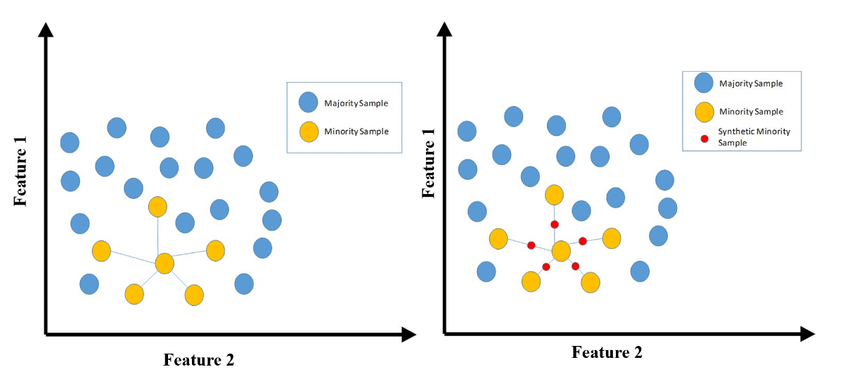

In [60]:
from imblearn.over_sampling import SMOTE

model_SM = SMOTE()
x_sm, y_sm = model_SM.fit_resample(x_train, y_train)
x_sm.shape, y_sm.shape

((192, 5), (192,))

In [61]:
x_train = x_sm
y_train = y_sm

model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [62]:
confusion_matrix(y_test, y_predict)

array([[39,  1],
       [ 6, 38]])

In [63]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.97      0.86      0.92        44

    accuracy                           0.92        84
   macro avg       0.92      0.92      0.92        84
weighted avg       0.92      0.92      0.92        84



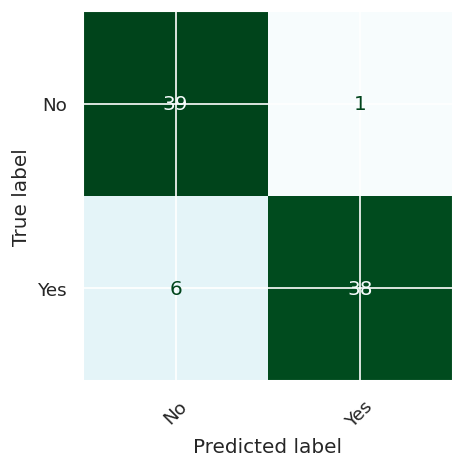

In [64]:
fig, ax = plt.subplots(figsize=(4,4))
labels = ['No','Yes']
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, ax = ax, colorbar=False, xticks_rotation = 45, cmap = 'BuGn', display_labels=labels)

III. CÁC CHỈ SỐ ĐÁNH GIÁ

- Dữ liệu liên tục (Hồi quy): R/R-square/MAE,MSE,RMSE
- Dữ liệu rời rạc: Precision, Recall, f1-score, ROC, AUC, score %

In [67]:
# ĐÁNH GIÁ MÔ HÌNH HỒI QUY (BIẾN LIÊN TỤC) SỬ DỤNG MỘT SỐ CHỈ SỐ ĐÁNH GIÁ

# 1. MAE

from sklearn.metrics import mean_absolute_error

# true values for the target variable
y_true = [1,2,3,4,5]

#predicted values for the target variable
y_predict = [0.9, 2.1, 2.9, 4.1, 4.9]

In [68]:
# calculate the mean absolute error
mae = mean_absolute_error(y_true, y_predict)
mae

0.0999999999999999

In [69]:
# calculate the mean squared error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_predict)
mse

0.009999999999999976

In [72]:
# calculate the root mean squared error

import math

rmse = math.sqrt(mse)
rmse

0.09999999999999988

In [71]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_predict)
r2

0.995

In [73]:
# mean absolute percentage error (MAPE)

def mean_absolute_percentage_error(y_true, y_predict):
  y_true, y_predict = np.array(y_true), np.array(y_predict)
  return np.mean(np.abs((y_true-y_predict)/y_predict))*100

In [74]:
mape = mean_absolute_percentage_error(y_true, y_predict)
mape

4.760226490371868

In [81]:
#1:-----------------------------------------Accuracy_score (Phần trăm dự đoán đúng)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)
#2:-----------------------------------------In ra báo cáo đánh giá của mô hình (f1 score, precision, recall)
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix
metrics.accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))
#3:-----------------------------------------#Vẽ confusion matrix
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#4:-----------------------------------------#Vẽ ROC, AUC (phân loại nhị phân)
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = tên_của_model.predict_proba(X_test)[:,1] #điền tên model của bạn vào đây
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ValueError: ignored

- Precision: Mức độ dự báo chính xác khi dự báo là Positive: Precision=TP/(TP+FP)

- Recall: Mức độ dự báo chuẩn xác những trường hợp là Positive trong những trường hợp thực tế là Positive. Recall=TP/(TP+FN)

- f1-score: Tỷ số trung bình điều hòa giữa Precision và Recall: = 2x(Precision x Recall)/(Precision+Recall)